In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import numpy as np
import pandas as pd
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.inception_v3 import InceptionV3, preprocess_input
#from keras.applications.vgg16 import preprocess_input, VGG16
#from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.models import Sequential, Model
from keras.optimizers import SGD, Adam
from keras.callbacks import ModelCheckpoint
from keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
from google.colab import files
import pickle


Name = "ResNet50-Train2-RandomWeights-Trainable"

os.listdir("/content/drive/MyDrive/Train2")
img_width, img_height = 256, 256
def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a = preprocess_input(a)
    return a


HEIGHT = 300
WIDTH = 300
base_model = InceptionV3(weights='imagenet',
                      include_top=False,
                      input_shape=(HEIGHT, WIDTH, 3),
                      classes = 9)

TRAIN_DIR = "/content/drive/MyDrive/Train2"

GEN_BATCH_SIZE = 8

train_datagen =  ImageDataGenerator(
      preprocessing_function=preprocess_input,
      rotation_range=90,
      horizontal_flip=True,
      vertical_flip=True,
    )

train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
                                                    target_size=(HEIGHT, WIDTH),
                                                    batch_size=GEN_BATCH_SIZE)


test_datagen =  ImageDataGenerator(
      preprocessing_function=preprocess_input,
      rotation_range=90,
      horizontal_flip=True,
      vertical_flip=True
    )
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/test2/test2',
        target_size=(HEIGHT, WIDTH),
        batch_size=GEN_BATCH_SIZE)

def build_finetune_model(base_model, dropout, fc_layers, num_classes):
    '''
    for layer in base_model.layers:
        layer.trainable = False
    '''
    x = base_model.output
    x = Flatten()(x)
    for fc in fc_layers:
        # New FC layer, random init
        x = Dense(fc, activation='relu')(x)
        x = Dropout(dropout)(x)

    # New softmax layer
    predictions = Dense(num_classes, activation='softmax')(x)

    finetune_model = Model(inputs=base_model.input, outputs=predictions)

    return finetune_model

class_list = os.listdir("/content/drive/MyDrive/Train2")
FC_LAYERS = [1024, 1024]
dropout = 0.5

finetune_model = build_finetune_model(base_model,
                                      dropout=dropout,
                                      fc_layers=FC_LAYERS,
                                      num_classes=len(class_list))

NUM_EPOCHS = 60
BATCH_SIZE = 32
num_train_images = 0
for cat in os.listdir('/content/drive/MyDrive/Train2'):
  for img in os.listdir(os.path.join('/content/drive/MyDrive/Train2', cat)):
    num_train_images += 1
print('Training Images #:', num_train_images)

adam = Adam(lr=0.00001)



finetune_model.compile(adam, loss='categorical_crossentropy', metrics=['accuracy'])


history = finetune_model.fit_generator(train_generator, epochs=NUM_EPOCHS, workers=32,
                                       steps_per_epoch=num_train_images // BATCH_SIZE,
                                       shuffle=True)

finetune_model.save('InceptionV3-v1.model')
pickle_out = open('ModelHistoryIV3-v1.pickle', 'wb')
pickle.dump(history.history, pickle_out, protocol=4)
pickle_out.close()

#finetune_model.save('/content/drive/MyDrive/ResNet50v5,3.model')
#pickle_out2 = open('/content/drive/MyDrive/ModelHistoryRN50v5,3.pickle', 'wb')
#pickle.dump(history.history, pickle_out2, protocol=4)
#pickle_out2.close()

Found 15431 images belonging to 9 classes.
Found 2505 images belonging to 9 classes.
Training Images #: 15431


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/60
482/482 [==============================] - 173s 340ms/step - loss: 2.6664 - accuracy: 0.1250
Epoch 2/60
482/482 [==============================] - 142s 289ms/step - loss: 2.1481 - accuracy: 0.1949
Epoch 3/60
482/482 [==============================] - 150s 305ms/step - loss: 2.0720 - accuracy: 0.2278
Epoch 4/60
482/482 [==============================] - 122s 248ms/step - loss: 1.9873 - accuracy: 0.2679
Epoch 5/60
482/482 [==============================] - 114s 232ms/step - loss: 1.9516 - accuracy: 0.2559
Epoch 6/60
482/482 [==============================] - 112s 227ms/step - loss: 1.8616 - accuracy: 0.3184
Epoch 7/60
482/482 [==============================] - 128s 261ms/step - loss: 1.8122 - accuracy: 0.3315
Epoch 8/60
482/482 [==============================] - 106s 216ms/step - loss: 1.7968 - accuracy: 0.3349
Epoch 9/60
482/482 [==============================] - 104s 209ms/step - loss: 1.7413 - accuracy: 0.3575
Epoch 10/60
482/482 [==============================] - 103s 207m

Streaming output truncated to the last 5000 lines.
answer::   Eczema 
----------------------------
guess::   Melanoma
answer::   Eczema 
----------------------------
guess::   Poison Ivy
answer::   Eczema 
----------------------------
guess::   Melanoma
answer::   Eczema 
----------------------------
guess::   Poison Ivy
answer::   Eczema 
----------------------------
guess::   Poison Ivy
answer::   Eczema 
----------------------------
guess::   Seborrheic Keratoses
answer::   Eczema 
----------------------------
guess::   Melanoma
answer::   Eczema 
----------------------------
guess::   Melanoma
answer::   Eczema 
----------------------------
guess::   Poison Ivy
answer::   Eczema 
----------------------------
guess::   Melanoma
answer::   Eczema 
----------------------------
guess::   Melanoma
answer::   Eczema 
----------------------------
guess::   Melanoma
answer::   Eczema 
----------------------------
guess::   Melanoma
answer::   Eczema 
----------------------------
guess::   

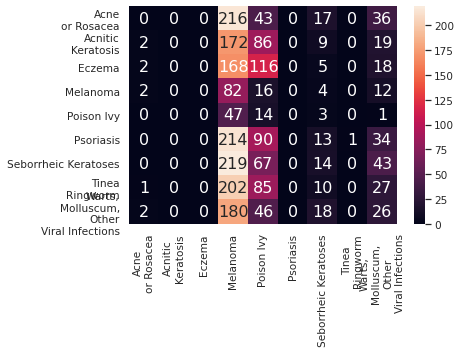

In [ ]:
import cv2
from tensorflow.keras.models import load_model
import os
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt

dataDir = "/content/drive/MyDrive/test3v2/test3"
imgSize = 300
CATEGORIES = ['Acne or Rosacea',
              'Acnitic Keratosis',
              'Eczema',
              'Melanoma',
              'Poison Ivy',
              'Psoriasis',
              'Seborrheic Keratoses',
              'Tinea Ringworm',
              'Warts, Molluscum, Other Viral Infections']

PoliticallyCorrectCategories = [
    'Acne\nor Rosacea',
  'Acnitic\nKeratosis',
  'Eczema',
  'Melanoma',
  'Poison Ivy',
  'Psoriasis',
  'Seborrheic Keratoses',
  'Tinea\nRingworm',
  'Warts,\nMolluscum,\nOther\nViral Infections']


model = load_model('/content/InceptionV3-v1.model')


score = 0
count = 0
for cat in os.listdir(dataDir):
  count += len(os.listdir(os.path.join(dataDir, cat)))
print('# of test images', count)
guess_list = []
answer_list = []
for category in CATEGORIES:
    path = os.path.join(dataDir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (imgSize, imgSize))
        image = new_array.reshape(-1, imgSize, imgSize, 3)
        prediction = model.predict([image])
        prediction = list(prediction[0])
        prediction = CATEGORIES[prediction.index(max(prediction))]
        print('guess::  ', prediction)
        print('answer::  ', category, '\n----------------------------')
        guess_list.append(prediction)
        answer_list.append(category)
        if str(prediction) == str(category):
            score += 1



print('score::', score)
print('count::', count)
print('raw result::', score/count)

cm = confusion_matrix(answer_list, guess_list, labels=CATEGORIES)
print(cm)

df_cm = pd.DataFrame(cm, PoliticallyCorrectCategories, PoliticallyCorrectCategories)

sn.set(font_scale=.95)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')

plt.show()

In [ ]:
import cv2
import tensorflow as tf
import time

CATEGORIES = ['Acne or Rosacea',
              'Acnitic Keratosis',
              'Eczema',
              'Melanoma',
              'Poison Ivy',
              'Psoriasis',
              'Seborrheic Keratoses',
              'Tinea Ringworm',
              'Warts, Molluscum, Other Viral Infections']

def prepare(file):
    imgSize = 300
    img_array = cv2.imread(file)
    new_array = cv2.resize(img_array, (imgSize, imgSize))
    return new_array.reshape(-1, imgSize, imgSize, 3)


model = tf.keras.models.load_model('/content/drive/MyDrive/ResNet50v5,3.model')
image = prepare('/content/drive/MyDrive/test3v2/test3/Acne or Rosacea/acne-closed-comedo-003.jpg')
start = time.time()
prediction = model.predict([image])
prediction = list(prediction[0])
print(CATEGORIES[prediction.index(max(prediction))])
end = time.time()
print('time taken:', end - start)

Acne or Rosacea
time taken: 7.496423244476318


<class 'dict'>


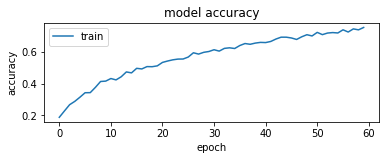

In [ ]:
from matplotlib import pyplot as plt
import pickle

ht = pickle.load(open('/content/drive/MyDrive/ModelHistoryRN50v5,3.pickle', 'rb'))

# summarize history for accuracy

plt.subplot(211)
plt.plot(ht['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss
'''
plt.subplot(212)
plt.plot(ht['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
'''
plt.show()
